In [1]:
import gzip
import numpy as np

# train-images-idx3-ubyte.gz: training set images (9912422 bytes)
# train-labels-idx1-ubyte.gz: training set labels (28881 bytes)
# t10k-images-idx3-ubyte.gz: test set images (1648877 bytes)
# t10k-labels-idx1-ubyte.gz: test set labels (4542 bytes)

def load_idx(filepath):
    with gzip.open(filepath, 'rb') as fin:
        idx_data = fin.read()
        idx = 0
        unsigned = idx_data[idx + 2] == 8
        dim = idx_data[idx + 3]
        idx += 4

        dim_shape = []
        for i in range(dim):
            dim_shape.append(int.from_bytes(idx_data[idx:idx+4], 'big', signed=False))
            idx += 4

        if unsigned:
            return np.frombuffer(idx_data[idx:], np.uint8).reshape(dim_shape)
        return None

def select_images():
    train_images_data = load_idx('data/train-images-idx3-ubyte.gz')
    train_labels_data = load_idx('data/train-labels-idx1-ubyte.gz')
    test_images_data = load_idx('data/t10k-images-idx3-ubyte.gz')
    test_labels_data = load_idx('data/t10k-labels-idx1-ubyte.gz')

    images_list = []
    labels_list = []
    for n in range(10):
        idx = np.where(train_labels_data == n)[0][:100]
        images_list.append(train_images_data[idx])
        labels_list.extend(train_labels_data[idx])
    train_images = np.vstack(images_list)
    train_labels = np.vstack(labels_list).reshape(-1)
    train_labels = np.eye(10)[train_labels]

    images_list = []
    labels_list = []
    for n in range(10):
        idx = np.where(test_labels_data == n)[0][:10]
        images_list.append(test_images_data[idx])
        labels_list.extend(test_labels_data[idx])
    test_images = np.vstack(images_list)
    test_labels = np.vstack(labels_list).reshape(-1)
    test_labels = np.eye(10)[test_labels]

    return train_images, train_labels, test_images, test_labels

train_images, train_labels, test_images, test_labels = select_images()

X_train = (train_images.reshape(train_images.shape[0], -1) / 255.0).astype(np.float64)
Y_train = train_labels.astype(np.float32)
X_test = (test_images.reshape(test_images.shape[0], -1) / 255.0).astype(np.float64)
Y_test = test_labels.astype(np.float64)

In [2]:
import sys
sys.path.append('build')
from pysimplednn import mlp1
import numpy as np

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

results = mlp1(X_train, Y_train, X_test, Y_test, 10)
results

X_train shape: (1000, 784)
Y_train shape: (1000, 10)
X_test shape: (100, 784)
Y_test shape: (100, 10)


[{'test_accuracy': 0.59,
  'test_loss': 121.433031736741,
  'train_accuracy': 0.35786290322580644,
  'train_loss': 1911.0628175203055},
 {'test_accuracy': 0.76,
  'test_loss': 191.67804534607473,
  'train_accuracy': 0.748991935483871,
  'train_loss': 804.1285648993314},
 {'test_accuracy': 0.8,
  'test_loss': 261.215850330177,
  'train_accuracy': 0.8377016129032258,
  'train_loss': 484.38945527394236},
 {'test_accuracy': 0.81,
  'test_loss': 324.1695316768869,
  'train_accuracy': 0.8840725806451613,
  'train_loss': 372.0076877473716},
 {'test_accuracy': 0.88,
  'test_loss': 362.5532083791169,
  'train_accuracy': 0.8951612903225806,
  'train_loss': 329.9396493466699},
 {'test_accuracy': 0.89,
  'test_loss': 398.5243685175439,
  'train_accuracy': 0.938508064516129,
  'train_loss': 225.20756153050306},
 {'test_accuracy': 0.9,
  'test_loss': 433.1753266545839,
  'train_accuracy': 0.9516129032258065,
  'train_loss': 173.06967099545892},
 {'test_accuracy': 0.89,
  'test_loss': 469.08279331240

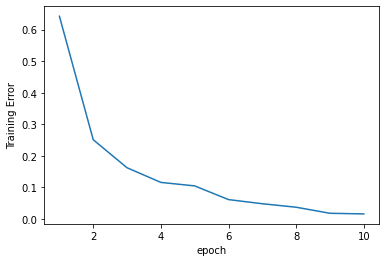

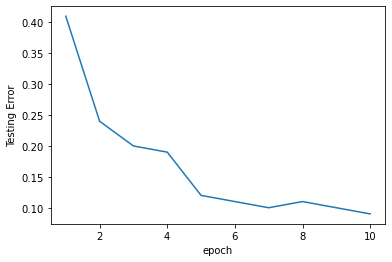

In [3]:
import matplotlib.pyplot as plt

x = list(range(1, len(results) + 1))
train_err = [1 - result['train_accuracy'] for result in results]
test_err = [1 - result['test_accuracy'] for result in results]

plt.plot(x, train_err)
plt.xlabel('epoch')
plt.ylabel('Training Error')
plt.show()

plt.plot(x, test_err)
plt.xlabel('epoch')
plt.ylabel('Testing Error')
plt.show()

In [4]:
import sys
sys.path.append('build')
from pysimplednn import mlp2
import numpy as np

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

results = mlp2(X_train, Y_train, X_test, Y_test, 10)
results

X_train shape: (1000, 784)
Y_train shape: (1000, 10)
X_test shape: (100, 784)
Y_test shape: (100, 10)


[{'test_accuracy': 0.1,
  'test_loss': 230.22336136052675,
  'train_accuracy': 0.0846774193548387,
  'train_loss': 2287.734972698007},
 {'test_accuracy': 0.1,
  'test_loss': 460.2313939261882,
  'train_accuracy': 0.10383064516129033,
  'train_loss': 2286.379631770572},
 {'test_accuracy': 0.1,
  'test_loss': 687.853932800814,
  'train_accuracy': 0.1431451612903226,
  'train_loss': 2278.1024052170956},
 {'test_accuracy': 0.31,
  'test_loss': 863.9357987383366,
  'train_accuracy': 0.23387096774193547,
  'train_loss': 2055.217092788068},
 {'test_accuracy': 0.61,
  'test_loss': 976.5310210462443,
  'train_accuracy': 0.48185483870967744,
  'train_loss': 1351.5445664905567},
 {'test_accuracy': 0.72,
  'test_loss': 1061.769130446915,
  'train_accuracy': 0.6743951612903226,
  'train_loss': 914.4525427833297},
 {'test_accuracy': 0.8,
  'test_loss': 1124.8050611660685,
  'train_accuracy': 0.7449596774193549,
  'train_loss': 721.5082343260865},
 {'test_accuracy': 0.86,
  'test_loss': 1172.13135461

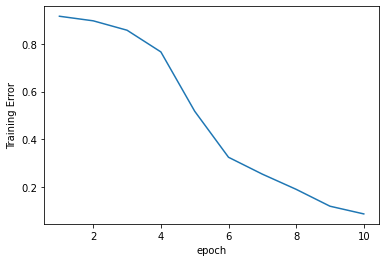

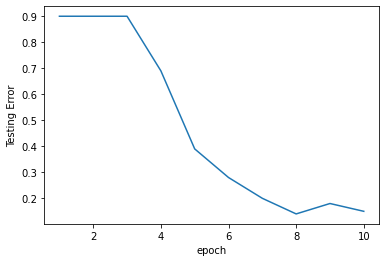

In [5]:
import matplotlib.pyplot as plt

x = list(range(1, len(results) + 1))
train_err = [1 - result['train_accuracy'] for result in results]
test_err = [1 - result['test_accuracy'] for result in results]

plt.plot(x, train_err)
plt.xlabel('epoch')
plt.ylabel('Training Error')
plt.show()

plt.plot(x, test_err)
plt.xlabel('epoch')
plt.ylabel('Testing Error')
plt.show()